# Preprocessing

We will continue to preprocess the data by applying the outlier and skewed data analysis.

In [43]:
import os
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
   
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Load Cleaned Data after Category Variable Analysis

In [44]:
print(os.getcwd())
print("")

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

train["is_train"] = 1
test["is_train"] = 0

#combine the data set
alldata = train.append(test)

alldata.head(5)

/home/mcheruvu/notebook

The train data has 1460 rows and 81 columns
The test data has 1459 rows and 81 columns


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,is_train
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1


# Outlier Analysis

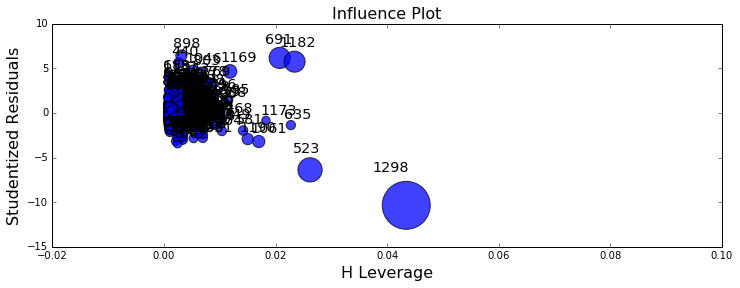

In [35]:
#for outlier analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula = "SalePrice ~ GrLivArea + GarageArea", data=train)
fitted = model.fit()    

plot = sm.graphics.influence_plot(fitted, criterion="cooks")

plot.savefig("../images/outliers.pdf", bbox_inches='tight')


We will delete the outlier rows from two key variables - GrLivArea and GarageArea

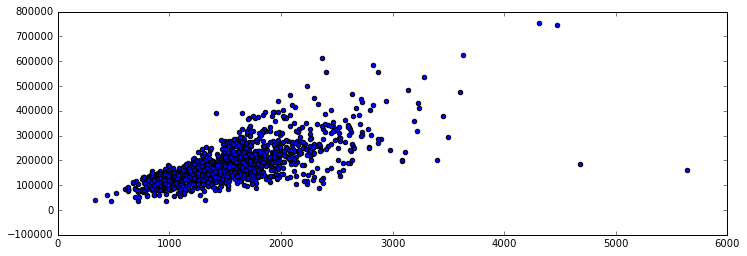

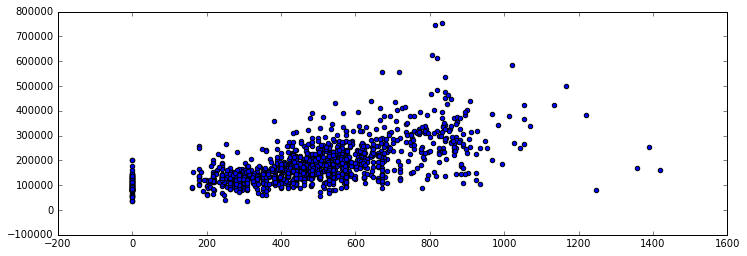

In [36]:
plot = plt.figure()
plt.scatter(x= train['GrLivArea'], y= train["SalePrice"])  
plot.savefig("../images/GrLivArea_outlier.pdf", bbox_inches='tight')
      
plot = plt.figure()
plt.scatter(x= train['GarageArea'], y= train["SalePrice"]) 
plot.savefig("../images/GarageArea_outlier.pdf", bbox_inches='tight')


# Visualize Skewed Data

We will analyze skewed data and plot graphs before and after applying logarithmic operation on all the numeric variables those have skewed more than 75%.

LotFrontage      1.370389
LowQualFinSF     8.976484
MSSubClass       1.401335
MasVnrArea       2.646117
MiscVal         24.413221
OpenPorchSF      2.336033
PoolArea        17.480260
SalePrice        1.570205
ScreenPorch      4.104812
WoodDeckSF       1.552411
dtype: float64


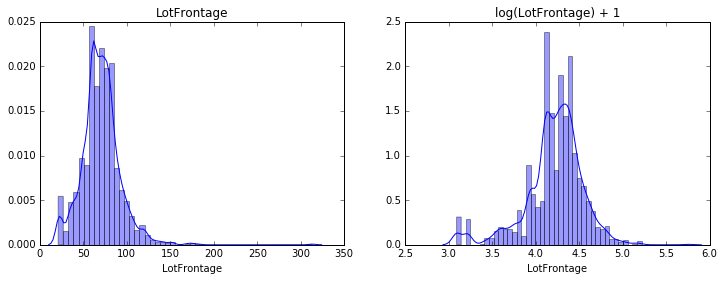

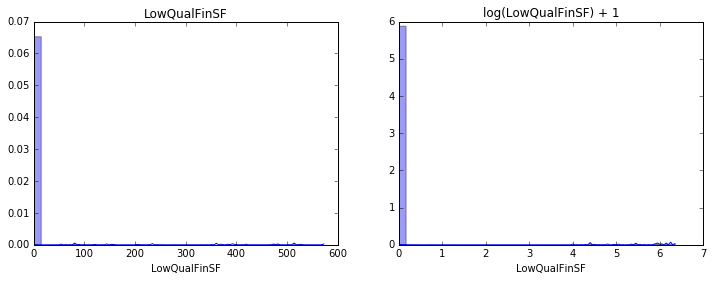

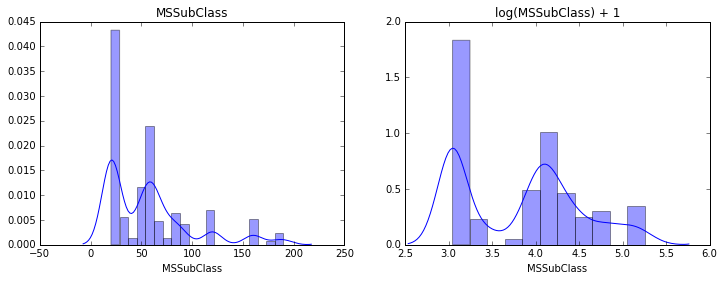

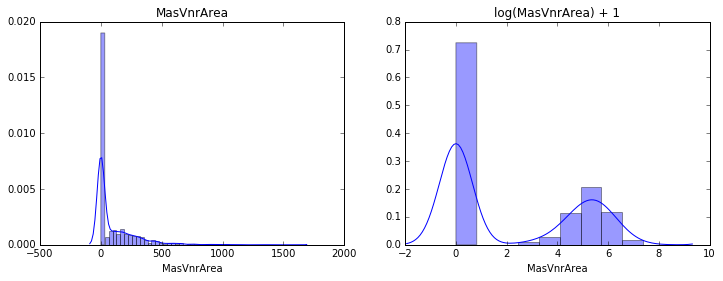

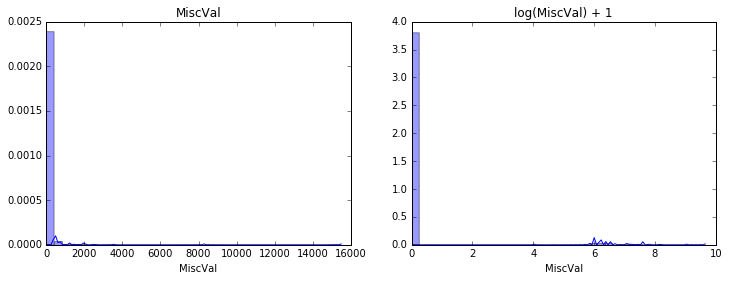

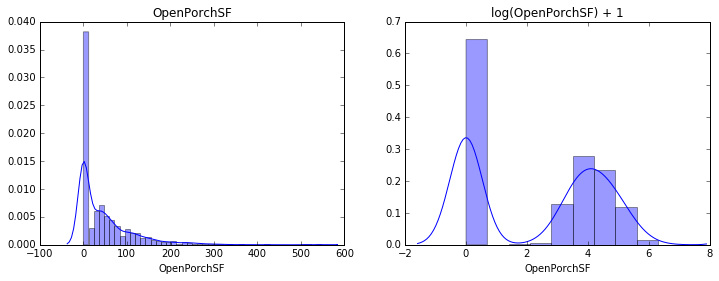

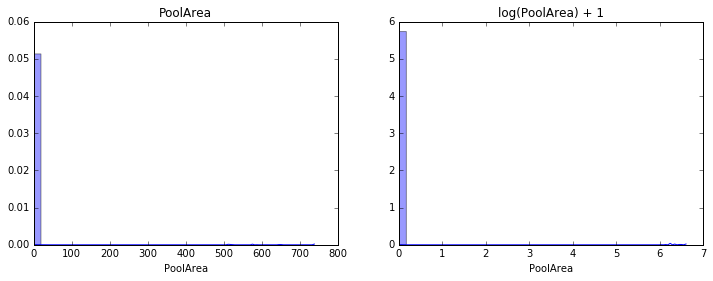

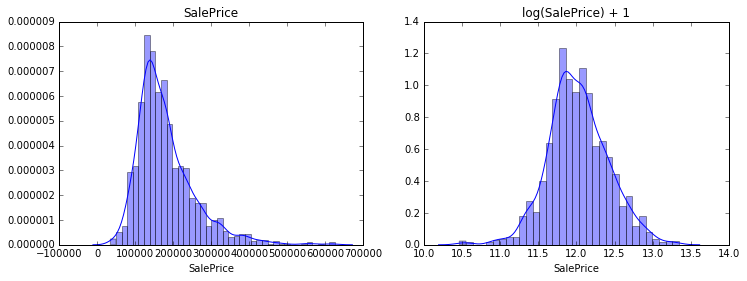

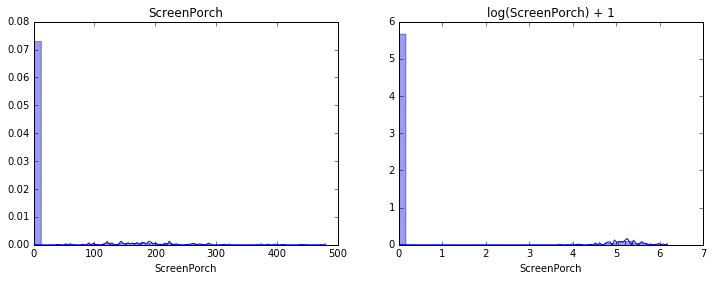

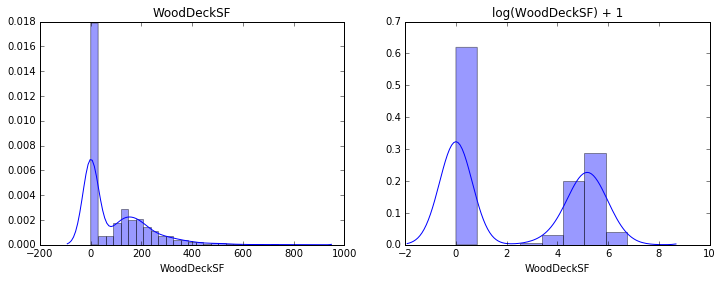

In [31]:
from scipy.stats import skew

numerical_features = [f for f in train.columns if train.dtypes[f] != 'object']
numerical_features.remove('Id')

#numerical_features.remove("is_train")

#analyze skewed train data
skewed = train[numerical_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]

print(skewed[10:])

plt.figure(figsize = (5,3))

for idx, val in enumerate(skewed.index[10:]):
        
    log_val = np.log1p(train[val])
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    sns.distplot(train[val], ax=ax1)
    ax1.set_title(val)
    
    sns.distplot(log_val, ax=ax2)
    ax2.set_title("log(" + val + ") + 1")
#end for


From the skewed plots before and after applying logarithmic operation, we can see that a few variables are skewed but they are not highly infulencing Sale Price. For now, we will just apply the logarithmic of one plus - log(SalePrice) + 1 to Sale Price variable. However, we will do this during the algorithm modeling time.